In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.classification import *
import function_script

In [25]:

if __name__ == "__main__":
    #Parameter
    target_csv  = 'abalone'#'50_50' # fill
    ground_truth = 'Sex' #'Diabetes_binary'
    Feature_Engineering = True
    split = '80_20'
    display_bool = False
    rand_seed = 42
    #1.1 Load ============================================================
    if target_csv == 'fill':
        df = pd.read_csv('../data/diabetes_binary_health_indicators_BRFSS2015.csv')
    if target_csv == '50_50':
        df = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
    if target_csv == 'abalone':
        df = pd.read_csv('../data/abalone.csv')
    #2.1 Feature Engineering ============================================================
    
    if target_csv == 'abalone' and Feature_Engineering == True:
        # Aspect Ratios
        df['Length_Diameter_Ratio'] = df['Length'] / (df['Diameter'] + 1e-8)
        df['Length_Height_Ratio'] = df['Length'] / (df['Height'] + 1e-8)
        df['Diameter_Height_Ratio'] = df['Diameter'] / (df['Height'] + 1e-8)

        # Weight Ratios 
        df['Shell_Whole_Weight_Ratio'] = df['Shell_weight'] / (df['Whole_weight']+ 1e-8)
        df['Shucked_Whole_Weight_Ratio'] = df['Shucked_weight'] / (df['Whole_weight']+ 1e-8)
        df['Viscera_Whole_Weight_Ratio'] = df['Viscera_weight'] / (df['Whole_weight']+ 1e-8)
        

    #3.1 Machine learning ============================================================
    #3.2 Splitting 60/20/20
    train_val_data, test_data = train_test_split(df, test_size=0.2, random_state=rand_seed) #split 80/20
    clf1 = setup(data=df,
                 target=ground_truth,
                 session_id=rand_seed,
                 train_size=0.75,  #split 80 to 60/20
                 #Preprocessing
                 preprocess=True,  # Enables preprocessing
                 normalize=True,  # Enables normalization
                 normalize_method='minmax'
                    
                )  # Specifies Min-Max normalization

,Description,Value
0,Session id,42
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 15)"
5,Transformed data shape,"(4177, 15)"
6,Transformed train set shape,"(3132, 15)"
7,Transformed test set shape,"(1045, 15)"
8,Numeric features,14
9,Preprocess,True


In [19]:
    best = compare_models()
    print(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5517,0.7445,0.5517,0.5449,0.5464,0.3252,0.3264,0.0710
gbc,Gradient Boosting Classifier,0.5514,0.7529,0.5514,0.5406,0.5396,0.3219,0.3259,0.2600
lr,Logistic Regression,0.5501,0.7503,0.5501,0.5402,0.5291,0.3187,0.3275,0.0120
et,Extra Trees Classifier,0.5498,0.7498,0.5498,0.5419,0.5431,0.3216,0.3232,0.0460
lightgbm,Light Gradient Boosting Machine,0.5460,0.7376,0.5460,0.5391,0.5405,0.3158,0.3170,1.5880
ridge,Ridge Classifier,0.5421,0.0000,0.5421,0.5264,0.5139,0.3081,0.3187,0.0060
lda,Linear Discriminant Analysis,0.5390,0.7435,0.5390,0.5328,0.5257,0.3022,0.3079,0.0060
knn,K Neighbors Classifier,0.5310,0.7118,0.5310,0.5269,0.5270,0.2972,0.2983,0.0110
svm,SVM - Linear Kernel,0.5237,0.0000,0.5237,0.5192,0.4579,0.2890,0.3276,0.0110
ada,Ada Boost Classifier,0.5211,0.7225,0.5211,0.5090,0.5101,0.2786,0.2812,0.0290


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


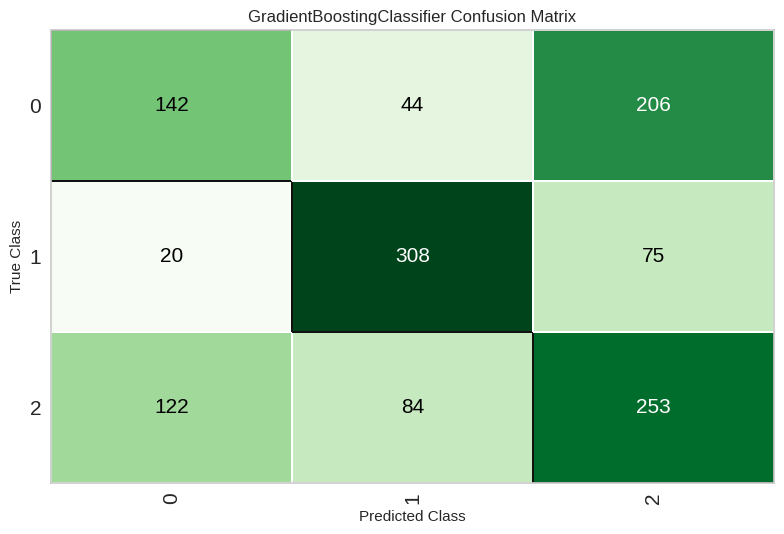

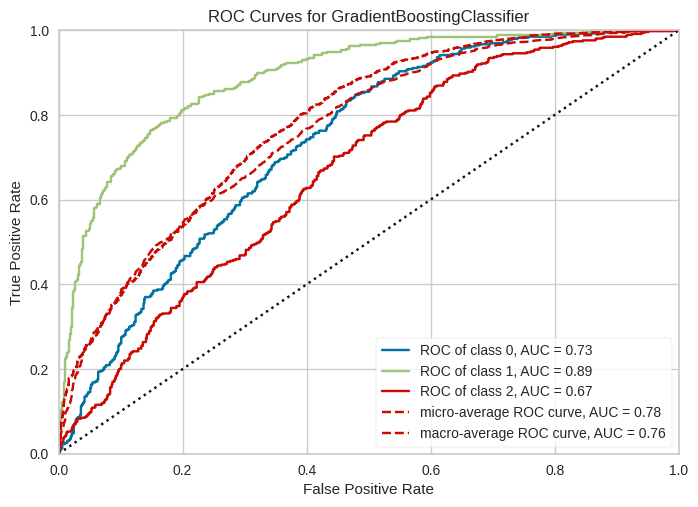

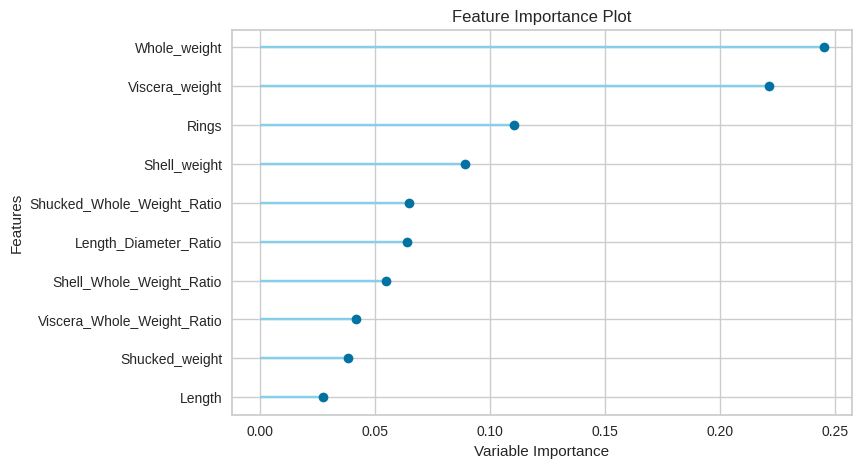

In [7]:
    #3.3 Model Information 
    plot_model(best, plot = 'confusion_matrix')
    plot_model(best, plot = 'auc')
    plot_model(best, plot = 'feature')

In [9]:
    #3.3 Model Information 
    holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5606,0.7586,0.5606,0.5567,0.5538,0.3359,0.3389


In [11]:
    prediction = predict_model(best, data = df)
    prediction.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6823,0.8519,0.6823,0.6862,0.6771,0.5200,0.5249


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length_Diameter_Ratio,Length_Height_Ratio,Diameter_Height_Ratio,Shell_Whole_Weight_Ratio,Shucked_Whole_Weight_Ratio,Viscera_Whole_Weight_Ratio,Sex,prediction_label,prediction_score
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143,0.414251,7.026947e-08,7.097392e-08,0.068379,0.053552,0.398035,0,F,0.4752
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429,0.460639,9.227244e-08,8.662058e-08,0.063969,0.061814,0.325976,2,M,0.4639
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714,0.418383,5.870173e-08,5.890923e-08,0.060871,0.060132,0.360066,2,M,0.5675
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429,0.432243,8.753516e-08,8.585805e-08,0.064278,0.068611,0.350933,0,M,0.5310
4176,0.858108,0.840336,0.172566,0.689393,0.635171,0.495063,0.491779,0.392857,0.427145,7.531094e-08,7.447043e-08,0.057734,0.068632,0.282155,2,M,0.7433
